# Import Liabaries

In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer ,TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [161]:
basketball = pd.read_csv("Basketball_1.csv")

In [162]:
football = pd.read_csv("football_1.csv")

# EDA AND CLEANING DATA

In [163]:
#check shape of data
basketball.shape

(7441, 114)

In [164]:
basketball.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media,is_video,link_flair_template_id,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,post_hint,preview,poll_data,author_cakeday
0,NaN,Basketball,Admins have banned other subs for this.\n\nNo ...,t2_aj47j,False,NaN,0,False,RULE REMINDER: You cannot Post Offers to Trade...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Basketball,"1) Bring your own ball. And if you don't, then...",t2_2mnqhtqq,False,NaN,0,False,"Global, Universal Rules of a Casual Shootaround",[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Basketball,I've been playing basketball for the past 3 an...,t2_qo4lyje4,False,NaN,0,False,I don't think I can do this anymore...,[],...,NaN,False,b33e9984-a0c3-11e9-b06f-0e4956f9169a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Basketball,"Yesterday, I finished my tryout and did very w...",t2_bsojpspca,False,NaN,0,False,What do you guys think are some good moves to ...,[],...,NaN,False,dda4de84-6559-11e6-9994-0e4704e28925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Basketball,My little brother (12) just sent me his Xmas l...,t2_4dasvr4c,False,NaN,0,False,Indoor Basketball,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
#check null values
basketball.isnull().sum()

approved_at_utc     7441
subreddit              0
selftext             785
author_fullname       33
saved                  0
                    ... 
crosspost_parent    7322
post_hint           7116
preview             7116
poll_data           7226
author_cakeday      7420
Length: 114, dtype: int64

In [166]:
football.shape

(7431, 114)

In [167]:
football.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,num_crossposts,media,is_video,post_hint,preview,url_overridden_by_dest,media_metadata,crosspost_parent_list,crosspost_parent,author_cakeday
0,NaN,football,"Dear r/football Community,\n\nWe've noticed an...",t2_aj47j,False,NaN,0,False,**Important Update for r/football - Elevating ...,"[{'a': ':Announcements:', 'e': 'emoji', 'u': '...",...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,football,"Discuss anything about football here! Tactics,...",t2_6l4z3,False,NaN,0,False,/r/Football Daily Discussion Thread,"[{'e': 'text', 't': 'Daily discussion'}]",...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,football,When comparing the greatest teams ever I think...,t2_12rxf6,False,NaN,0,False,Which team was greater: Ac Milan 1989-95 or Ba...,"[{'e': 'text', 't': 'Discussion'}]",...,0,NaN,False,self,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN
3,NaN,football,"I love my hermanos argentinos, Argentina is a ...",t2_j31hftbx,False,NaN,0,False,Similiar country rivalries to Brazil x Argenti...,"[{'e': 'text', 't': 'Discussion'}]",...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,football,NaN,t2_7ts4nnm5,False,NaN,0,False,Raging Arteta labels Arsenal defeat a ‘disgrac...,"[{'e': 'text', 't': 'News'}]",...,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,https://talksport.com/football/1629357/mikel-a...,NaN,NaN,NaN,NaN


In [168]:
football.isnull().sum()

approved_at_utc           7431
subreddit                    0
selftext                  1200
author_fullname             40
saved                        0
                          ... 
url_overridden_by_dest    6023
media_metadata            7323
crosspost_parent_list     7348
crosspost_parent          7348
author_cakeday            7410
Length: 114, dtype: int64

In [169]:
#Drop all columns keep only subreddit,selftext,title
# List of columns to keep
columns_to_keep_1 = ['subreddit', 'selftext', 'title']

# Dropping unnecessary columns from fitness dataframe
football = football[columns_to_keep_1]

# List of columns to keep
columns_to_keep_2 = ['subreddit', 'selftext', 'title']

# Dropping unnecessary columns from fitness dataframe
basketball = basketball[columns_to_keep_2]


In [170]:
#drop duplicates
basketball = basketball.drop_duplicates(subset=['selftext','title'])
football = football.drop_duplicates(subset=['selftext', 'title'])

In [171]:
#Check rows and columns after duplicated
print(f"Basketball shape : {basketball.shape}")
print(f"Football shape : {football.shape}")

Basketball shape : (694, 3)
Football shape : (651, 3)


In [172]:
#Check null values
basketball.isnull().sum()

subreddit     0
selftext     73
title         0
dtype: int64

In [173]:
#Check null values
football.isnull().sum()

subreddit      0
selftext     113
title          0
dtype: int64

In [174]:
# Concatenate the two dataframes
combined_df = pd.concat([basketball, football], ignore_index=True)

In [175]:
#drop null values
combined_df = combined_df.dropna(subset=['selftext'])

In [176]:
# Check for missing values after drop null values
combined_df.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [177]:
#Check datafram after concat football,baasketball
combined_df.head()

,subreddit,selftext,title
0,Basketball,Admins have banned other subs for this.\n\nNo ...,RULE REMINDER: You cannot Post Offers to Trade...
1,Basketball,"1) Bring your own ball. And if you don't, then...","Global, Universal Rules of a Casual Shootaround"
2,Basketball,I've been playing basketball for the past 3 an...,I don't think I can do this anymore...
3,Basketball,"Yesterday, I finished my tryout and did very w...",What do you guys think are some good moves to ...
4,Basketball,My little brother (12) just sent me his Xmas l...,Indoor Basketball


In [178]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define a list of custom stopwords to remove stopword "english" + "Basketball" + "Football"
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["football", "basketball"])

# Define the text cleaning function with lemmatization and custom stopwords
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords, including custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the cleaning function to the 'selftext' and 'title' columns
combined_df['selftext'] = combined_df['selftext'].apply(clean_text)
combined_df['title'] = combined_df['title'].apply(clean_text)

Basketball    621
football      538
Name: subreddit, dtype: int64


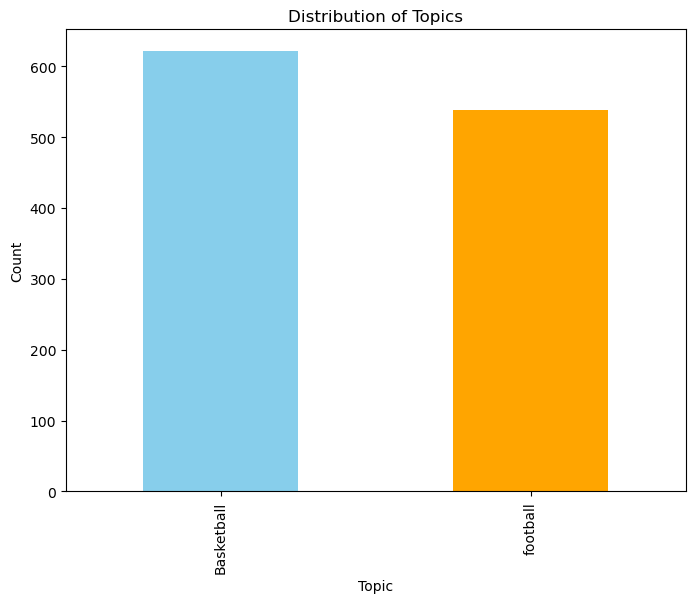

In [179]:
# Check the distribution of topics
topic_distribution = combined_df['subreddit'].value_counts()

# Print the distribution of topics
print(topic_distribution)

# Visualize the distribution of topics (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
topic_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


In [180]:
# Use label encoding to convert 'subreddit' into numerical values (0 for 'Basketball', 1 for 'Football')
combined_df['topic_encoded'] = combined_df['subreddit'].apply(lambda x: 0 if x == 'Basketball' else 1)

# Check the updated dataframe
print(combined_df[['subreddit', 'topic_encoded']].head())
print(combined_df[['subreddit', 'topic_encoded']].tail())


    subreddit  topic_encoded
0  Basketball              0
1  Basketball              0
2  Basketball              0
3  Basketball              0
4  Basketball              0
     subreddit  topic_encoded
1340  football              1
1341  football              1
1342  football              1
1343  football              1
1344  football              1


In [181]:
# Drop columns containing "basketball" and "football" is subreddit and usse Topic_encoded instead
combined_df.drop(columns=["subreddit"], inplace=True)


In [182]:
#Check datafram after drop Subreddit and use topic_encoded instead
combined_df.head()

,selftext,title,topic_encoded
0,admins banned sub asking posting code program ...,rule reminder post offer trade sell copyright ...,0
1,bring ball dont ask others shoot miss guy make...,global universal rule casual shootaround,0
2,ive playing past half year absolutely love spo...,dont think anymore,0
3,yesterday finished tryout well minute scrimmag...,guy think good move drive,0
4,little brother sent xmas list there many relat...,indoor,0


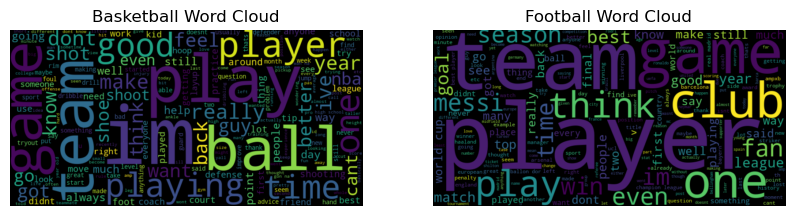

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for basketball
basketball_text = " ".join(post for post in combined_df[combined_df['topic_encoded'] == 0]['selftext'])
wordcloud_basketball = WordCloud(width=800, height=400).generate(basketball_text)

# Create a word cloud for football
football_text = " ".join(post for post in combined_df[combined_df['topic_encoded'] == 1]['selftext'])
wordcloud_football = WordCloud(width=800, height=400).generate(football_text)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_basketball, interpolation='bilinear')
plt.title('Basketball Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_football, interpolation='bilinear')
plt.title('Football Word Cloud')
plt.axis('off')

plt.show()


**The word cloud visualizes the frequency of common words for each sports**

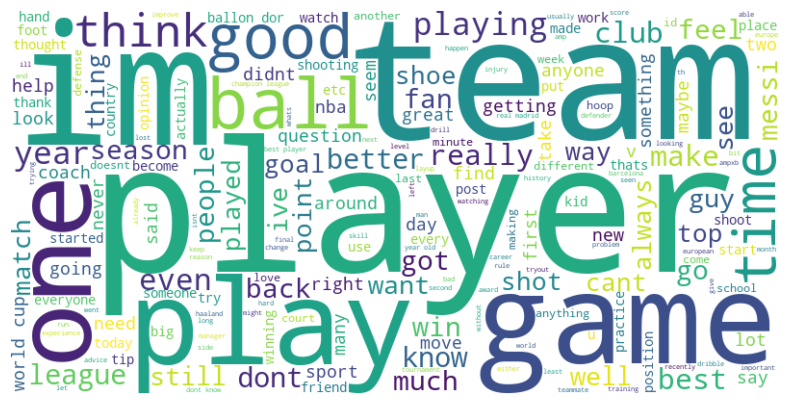

In [184]:
# Combine 'selftext' and 'title' columns for wordcloud generation
text_combined = ' '.join(combined_df['selftext'].tolist() + combined_df['title'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**The word cloud visualizes the frequency of common words for both sports**

Examples of overlapping words found in both sports categories
- Word: im, Total Count: 607, Basketball Count: 484, Football Count: 123
- Word: player, Total Count: 535, Basketball Count: 194, Football Count: 341
- Word: team, Total Count: 505, Basketball Count: 237, Football Count: 268
- Word: game, Total Count: 433, Basketball Count: 229, Football Count: 204
- Word: play, Total Count: 399, Basketball Count: 265, Football Count: 134
- Word: year, Total Count: 312, Basketball Count: 167, Football Count: 145

## Preprocessing 


In [185]:
# Define features and target variable
X = combined_df['selftext'] + combined_df['title']
y = combined_df['topic_encoded']

# Split the data into training set (80%)  and validation sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [186]:
#Check data of X_train
X_train

301     playing year want start training seriously two...
612     hi trying learn something technical could sugg...
1300        whats namebundesliga highlight show like motd
1281    average meaning theyve league long time last d...
626     like decently ranked one one topcould top scho...
                              ...                        
492     wnba better nba well first seen threepointers ...
692     get soft touch dribbling layup im like control...
1304    hey guy couple month ago became assistant coac...
1098    crazy imagine amazing player like toni kroos r...
1169    telegraph report talk whether illuminate wembl...
Length: 927, dtype: object

In [187]:
#Check data of X_test
X_test

423     expecting top shooter time one greatest interi...
978     hi everyone hope belongs since didnt find sub ...
234     hey guy always find looking great drill instag...
1104    award trophy earned outside europe count ballo...
1084    goal game rom goal game european qualifierrome...
                              ...                        
440     im considering buying used version one ive fou...
1238    one making clear statement regarding messis in...
702            club internationalfanbase biggest cry baby
869     example people rsoccer happy messi winning yea...
928     noticed sheffield box shot utd copenhagen also...
Length: 232, dtype: object

# Modeling & Evaluation





In [188]:
baseline_model = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('clf', LogisticRegression(random_state=42))
])

# Fit the baseline model on the training data
baseline_model.fit(X_train, y_train)

# Predictions on the testing data
y_pred_train = baseline_model.predict(X_train)
y_pred_test = baseline_model.predict(X_test)

# Evaluate the baseline model
# Evaluate the model on the training set
classification_report_train = classification_report(y_train, y_pred_train)
print("Baseline Model Evaluation Train:")
print(classification_report_train)
print("Baseline Model Evaluation Test:")
print(classification_report(y_test, y_pred_test))


Baseline Model Evaluation Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       497
           1       1.00      1.00      1.00       430

    accuracy                           1.00       927
   macro avg       1.00      1.00      1.00       927
weighted avg       1.00      1.00      1.00       927

Baseline Model Evaluation Test:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       124
           1       0.90      0.87      0.88       108

    accuracy                           0.89       232
   macro avg       0.89      0.89      0.89       232
weighted avg       0.89      0.89      0.89       232



In [189]:
# Define a pipeline with CountVectorizer and TfidfTransformer followed by Logistic Regression
pipeline_logistic = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('log', LogisticRegression(max_iter=1000))
])

# Define a parameter grid for grid search
param_grid = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'log__max_iter': [1000,2000,3000,4000,5000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_logistic, param_grid= param_grid, cv=5)

# Perform grid search and train the model
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train_logis = best_model.predict(X_train)

# Predict on the test set
y_pred_test_logis = best_model.predict(X_test)

# Evaluate the model on the training set
classification_report_train = classification_report(y_train, y_pred_train_logis)
print("Training Set Classification Report(Logistic regression with Countvectorizer):")
print(classification_report_train)

# Evaluate the model on the test set
classification_report_test = classification_report(y_test, y_pred_test_logis)
print("Testing Set Classification Report (Logistic regression with Countvectorizer):")
print(classification_report_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Training Set Classification Report(Logistic regression with Countvectorizer):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       497
           1       1.00      1.00      1.00       430

    accuracy                           1.00       927
   macro avg       1.00      1.00      1.00       927
weighted avg       1.00      1.00      1.00       927

Testing Set Classification Report (Logistic regression with Countvectorizer):
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       124
           1       0.89      0.87      0.88       108

    accuracy                           0.89       232
   macro avg       0.89      0.89      0.89       232
weighted avg       0.89      0.89      0.89       232

Best Hyperparameters:
{'cvec__max_df': 0.9, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'log__max_iter': 1000}


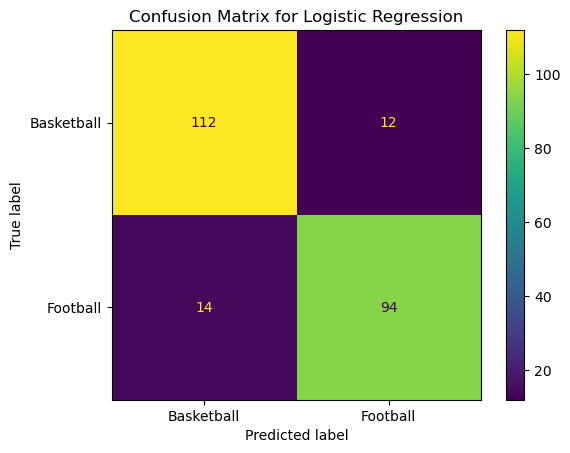

In [190]:
def display_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Basketball", "Football"])
    disp.plot(cmap='viridis', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

#Logistics Regression 
#TN : Predict Basketball Actual Basketball
#FN : Predict Basketball Actual Football
#TP :Predict Football Actual Football 
#FP : Predict Football Actual Basketball
display_confusion_matrix("Logistic Regression", y_test, y_pred_test_logis)

In [191]:
# Define a pipeline with CountVectorizer and TfidfTransformer followed by Random Forest
pipeline_rfc = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('rfc', RandomForestClassifier())
])

# Define a parameter grid for grid search
param_grid = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    "rfc__random_state" :[300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_rfc, param_grid, cv=5)

# Perform grid search and train the model on the training set
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train_rfc = best_model.predict(X_train)

# Predict on the test set
y_pred_test_rfc = best_model.predict(X_test)

# Evaluate the model on the training set
classification_report_train = classification_report(y_train, y_pred_train_rfc)
print("Training Set Classification Report(Random Forest with Countvectorizer):")
print(classification_report_train)

# Evaluate the model on the test set
classification_report_test = classification_report(y_test, y_pred_test_rfc)
print("Testing Set Classification Report (Random Forest with Countvectorizer):")
print(classification_report_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Training Set Classification Report(Random Forest with Countvectorizer):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       497
           1       1.00      1.00      1.00       430

    accuracy                           1.00       927
   macro avg       1.00      1.00      1.00       927
weighted avg       1.00      1.00      1.00       927

Testing Set Classification Report (Random Forest with Countvectorizer):
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       124
           1       0.97      0.80      0.87       108

    accuracy                           0.89       232
   macro avg       0.91      0.89      0.89       232
weighted avg       0.90      0.89      0.89       232

Best Hyperparameters:
{'cvec__max_df': 0.9, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'rfc__random_state': 300}


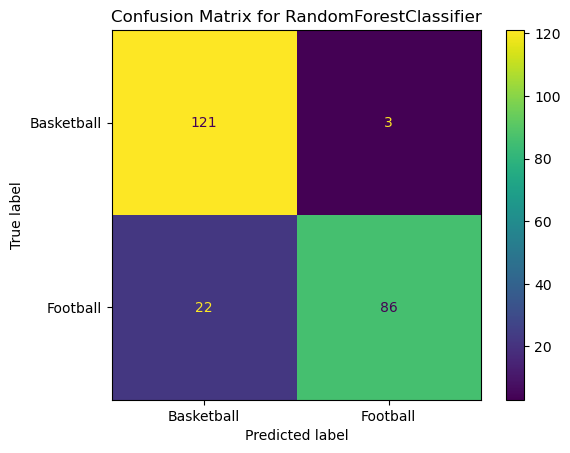

In [192]:
display_confusion_matrix("RandomForestClassifier", y_test, y_pred_test_rfc)
#Random Forest
#TN : Predict Basketball Actual Basketball
#FN : Predict Basketball Actual Football
#TP :Predict Football Actual Football 
#FP : Predict Football Actual Basketball

In [193]:
# Define a pipeline with CountVectorizer and TfidfTransformer followed by Naive Bayes
pipeline_nb = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Define a parameter grid for grid search
param_grid = {
     'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_nb, param_grid, cv=5)

# Perform grid search and train the model on the training set
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train_nb = best_model.predict(X_train)

# Predict on the test set
y_pred_test_nb = best_model.predict(X_test)

# Evaluate the model on the training set
classification_report_train = classification_report(y_train, y_pred_train_nb)
print("Training Set Classification Report (Naive Bayes with Countvectorizer):")
print(classification_report_train)

# Evaluate the model on the test set
classification_report_test = classification_report(y_test, y_pred_test_nb)
print("Testing Set Classification Report  (Naive Bayes with Countvectorizer):")
print(classification_report_test)
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Training Set Classification Report (Naive Bayes with Countvectorizer):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       497
           1       0.97      0.91      0.94       430

    accuracy                           0.94       927
   macro avg       0.95      0.94      0.94       927
weighted avg       0.95      0.94      0.94       927

Testing Set Classification Report  (Naive Bayes with Countvectorizer):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       124
           1       0.92      0.90      0.91       108

    accuracy                           0.91       232
   macro avg       0.91      0.91      0.91       232
weighted avg       0.91      0.91      0.91       232

Best Hyperparameters:
{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}


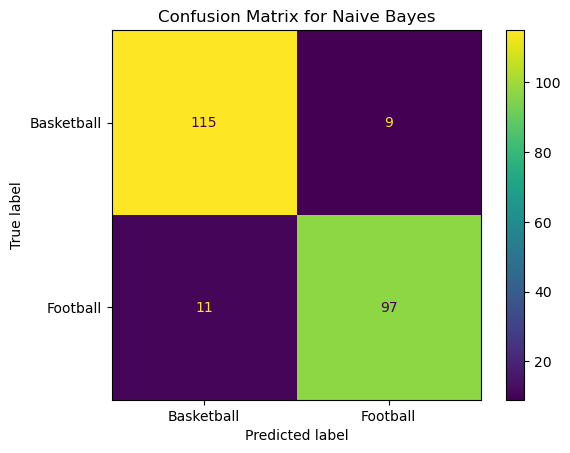

In [194]:
#Naice Bayse 
#TN : Predict Basketball Actual Basketball
#FN : Predict Basketball Actual Football
#TP :Predict Football Actual Football 
#FP : Predict Football Actual Basketball
display_confusion_matrix("Naive Bayes", y_test, y_pred_test_nb)

**Try to tuning hyperparameters** 

In [195]:
# Define a pipeline with CountVectorizer and TfidfTransformer followed by Naive Bayes
#Try to tuning hyperparameter 
pipeline_nb = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Define a parameter grid for grid search
param_grid = {
     'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.1, 0.5, 1.0], 
    'nb__fit_prior': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_nb, param_grid, cv=5)

# Perform grid search and train the model on the training set
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train_nb = best_model.predict(X_train)

# Predict on the test set
y_pred_test_nb = best_model.predict(X_test)

# Evaluate the model on the training set
classification_report_train = classification_report(y_train, y_pred_train_nb)
print("Training Set Classification Report  (Naive Bayes with Countvectorizer):")
print(classification_report_train)

# Evaluate the model on the test set
classification_report_test = classification_report(y_test, y_pred_test_nb)
print("Testing Set Classification Report  (Naive Bayes with Countvectorizer):")
print(classification_report_test)
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Training Set Classification Report  (Naive Bayes with Countvectorizer):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       497
           1       0.97      0.91      0.94       430

    accuracy                           0.94       927
   macro avg       0.95      0.94      0.94       927
weighted avg       0.95      0.94      0.94       927

Testing Set Classification Report  (Naive Bayes with Countvectorizer):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       124
           1       0.92      0.90      0.91       108

    accuracy                           0.91       232
   macro avg       0.91      0.91      0.91       232
weighted avg       0.91      0.91      0.91       232

Best Hyperparameters:
{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'nb__alpha': 1.0, 'nb__fit_prior': True}


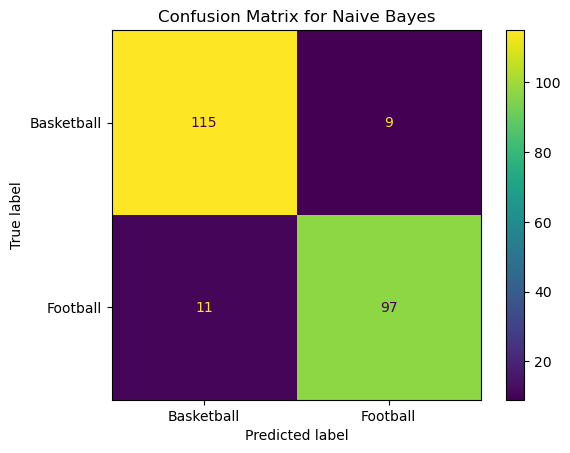

In [196]:
#Naice Bayse 
#TN : Predict Basketball Actual Basketball
#FN : Predict Basketball Actual Football
#TP :Predict Football Actual Football 
#FP : Predict Football Actual Basketball
display_confusion_matrix("Naive Bayes", y_test, y_pred_test_nb)

## Error Analysis

- True Positive (TP): The model correctly predicted posts related to football 97 posts
- True Negative (TN): The model correctly predicted posts related to basketball. 115 posts
- False Positive (FP): The model predicted posts as football but they aret basketball  9 post
- False Negative (FN): The model predicted posts as basketball but they are football 11 post

In [197]:
result_df = pd.DataFrame({'true':y_test, 'pred':y_pred_test})
missprediction = result_df[result_df['true']!=result_df['pred']]
missprediction.head()

,true,pred
24,0,1
972,1,0
465,0,1
95,0,1
609,0,1


In [199]:
#find sentences where the model is categorizing incorrectly,
for text in X_test[(missprediction['true'] == 1).index]:
    print(text)
    print('-'*50)

year old born povertylebron didnt dad ronaldos dad alcoholic lead sport point scored insane longevity multiple top tier club championshipsnba title ucl played multiple top team scoring titlegolden boot compared rivaled short midgetssteph messi played two greatest team sportlakers real madrid returned club became star atman utd cleveland famous respective sport considered goatlebron ronaldo many similarity career
--------------------------------------------------
hello everyone age rlly good agile allot stamen fitness gram pacer test yr covid lost everything take blame room rotting sleeping im still cant get back old self getting chosen team say last compulsion take play lw get ball either great run rarely happen anymore like week loose ive lost stamen one run get tired plz help im rlly stressed cause wont make teambest shitiest
--------------------------------------------------
former player went court everyday office lol im getting back run gym monday thursday however leg arent like u

## Conclusion and Recommendation

- In evaluating the use of the `Title+Selftext` features, we found that it yielded the best results. The `Naive Bayes` model with `CountVectorizer` achieved the highest performance, with an `F1-score` of 0.94 on the training set and 0.91 on the test set. 

- Continuous Model Monitoring: Implement a system for continuous model monitoring to promptly identify any shifts in data distribution or performance degradation. This ensures the model remains effective in the dynamic online community environment.

-  User Feedback: Integrate mechanisms for collecting and incorporating user feedback on post categorizations. This iterative process ensures the model aligns with user preferences.
